In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

In [3]:
df = pd.read_csv("earthquake_data_tsunami.csv")

In [4]:
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [6]:
print(df.isnull().sum())

magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64


In [8]:
df.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


In [9]:
df.shape

(782, 13)

In [10]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [11]:
print(df.index)

RangeIndex(start=0, stop=782, step=1)


In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
777    False
778    False
779    False
780    False
781    False
Length: 782, dtype: bool

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.columns

Index(['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
       'latitude', 'longitude', 'Year', 'Month', 'tsunami'],
      dtype='object')

In [15]:
df.dropna(how='all', inplace=True)

# 1. Time-Based Analysis:

*Explore how earthquake occurrences and tsunami events have changed over the 22-year period (2001–2022).

In [16]:
# Earthquake count per year
yearly_quakes = df.groupby('Year').size()
yearly_quakes

Year
2001    28
2002    25
2003    31
2004    32
2005    28
2006    26
2007    37
2008    25
2009    26
2010    41
2011    34
2012    31
2013    53
2014    48
2015    53
2016    43
2017    36
2018    43
2019    33
2020    27
2021    42
2022    40
dtype: int64

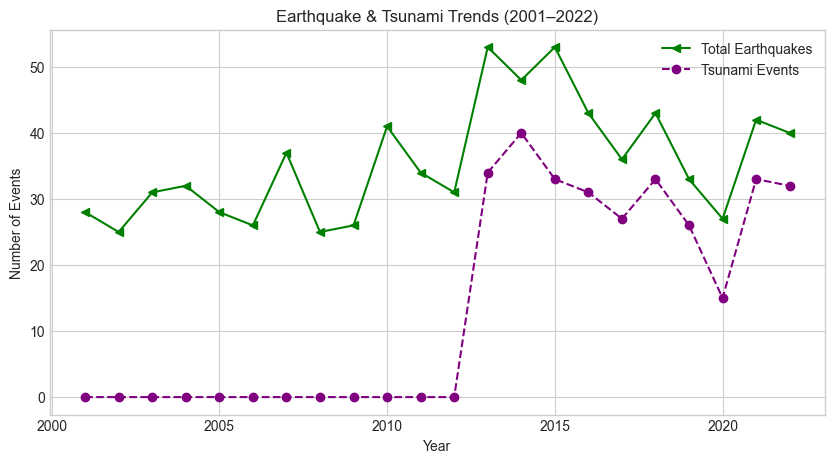

In [21]:
# Group earthquake counts per year
earthquake_count = df.groupby('Year').size()

# Group tsunami events per year (sum of 1s and 0s)
tsunami_count = df.groupby('Year')['tsunami'].sum()

# Plot directly using those grouped results
plt.figure(figsize=(10,5))
plt.plot(earthquake_count.index, earthquake_count.values, 
         marker='<', linestyle='-', color='green', label='Total Earthquakes')

plt.plot(tsunami_count.index, tsunami_count.values, 
         marker='o', linestyle='--', color='purple', label='Tsunami Events')

plt.title("Earthquake & Tsunami Trends (2001–2022)")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.legend()
plt.grid(True)
plt.show()

*Identify any trends in the frequency or magnitude of earthquakes over time.

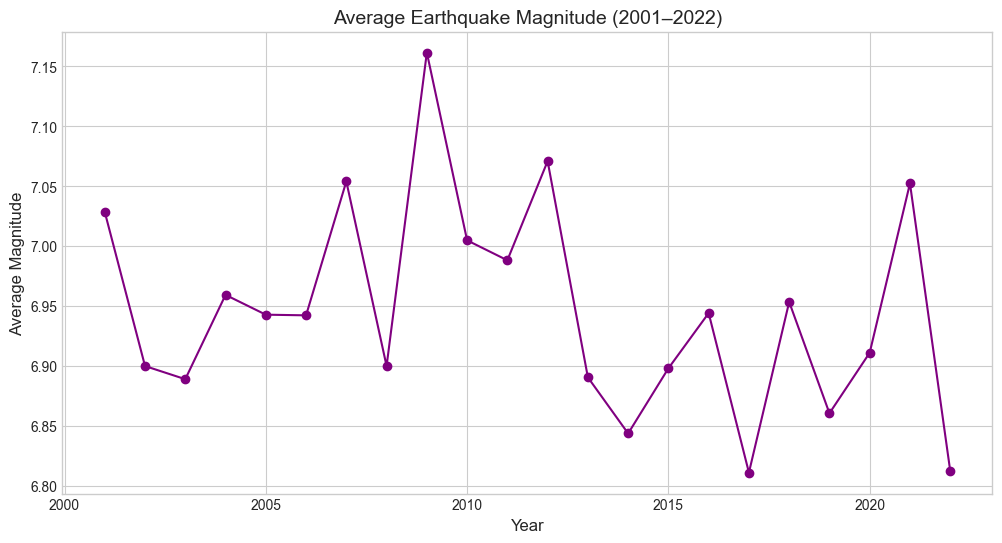

In [24]:
# Group by Year to calculate average magnitude
yearly_magnitude = df.groupby("Year")["magnitude"].mean().reset_index()

# Plot the average magnitude trend
plt.figure(figsize=(12,6))
plt.plot(yearly_magnitude["Year"], yearly_magnitude["magnitude"], 
         marker='o', color='purple')

# Add title and labels
plt.title("Average Earthquake Magnitude (2001–2022)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Magnitude", fontsize=12)

plt.show()

# 2. Magnitude and Depth Analysis:

*Analyze the distribution of earthquake magnitudes and depths.

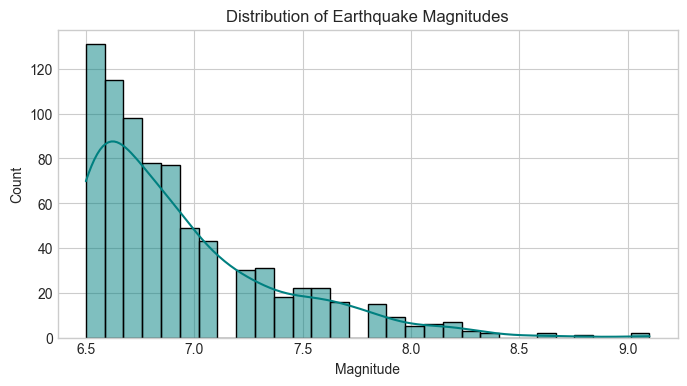

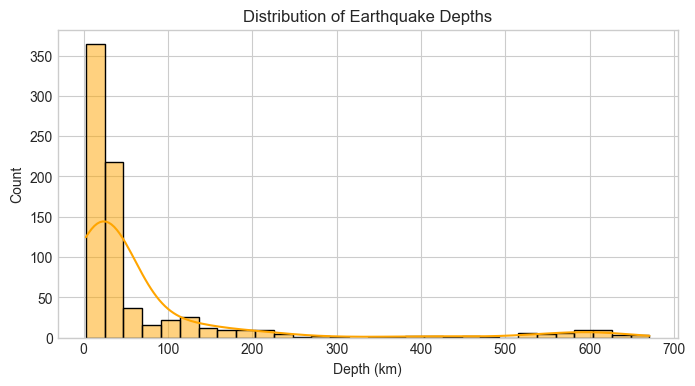

In [27]:
# Magnitude & Depth Distribution (uses your 'magnitude' column)
plt.figure(figsize=(8,4))
sns.histplot(df['magnitude'], bins=30, kde=True, color='teal')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude'); plt.ylabel('Count'); plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['depth'], bins=30, kde=True, color='orange')
plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depth (km)');
plt.ylabel('Count'); 
plt.show()

*Compare the average magnitude and depth of tsunami vs. non-tsunami events.

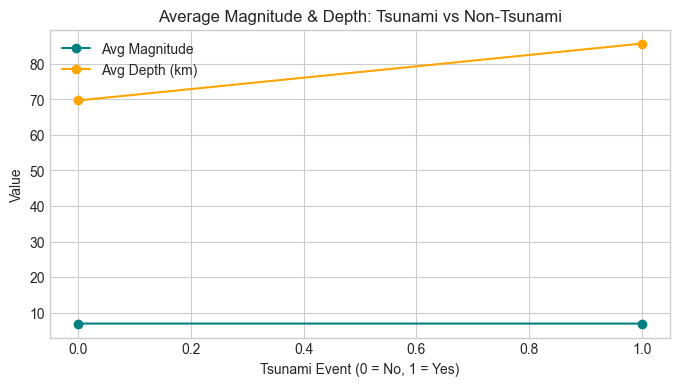

Average Values:
    tsunami  magnitude      depth
0        0   6.942803  69.667356
1        1   6.938487  85.656796


In [30]:
# Calculate averages for tsunami (1) and non-tsunami (0)
avg_values = df.groupby('tsunami')[['magnitude','depth']].mean().reset_index()

# Line graph
plt.figure(figsize=(8,4))
plt.plot(avg_values['tsunami'], avg_values['magnitude'], '-o', color='teal', label='Avg Magnitude')
plt.plot(avg_values['tsunami'], avg_values['depth'], '-o', color='orange', label='Avg Depth (km)')
plt.title('Average Magnitude & Depth: Tsunami vs Non-Tsunami')
plt.xlabel('Tsunami Event (0 = No, 1 = Yes)')
plt.ylabel('Value')
plt.legend(); 
plt.grid(True);
plt.show()
print("Average Values:\n", avg_values)


*Highlight major earthquakes (≥8.0) and their characteristics.

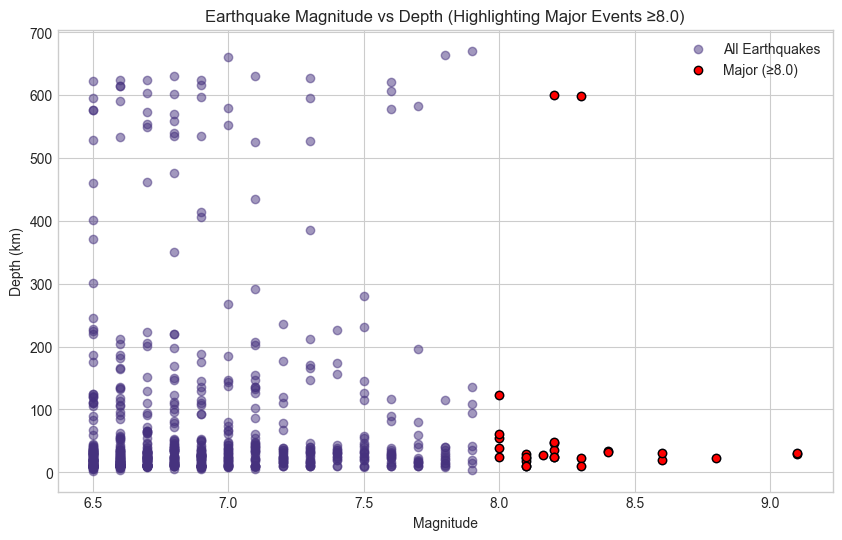

     Year  magnitude   depth  tsunami
56   2021       8.10   22.79        0
59   2021       8.20   46.66        1
60   2021       8.20   35.00        1
74   2021       8.10   28.93        1
129  2019       8.00  122.57        1
170  2018       8.20  600.00        1
198  2017       8.20   47.39        1
285  2015       8.30   22.44        1
356  2014       8.20   25.00        1
393  2013       8.30  598.10        1
414  2013       8.00   24.00        1
440  2012       8.20   25.10        0
441  2012       8.60   20.00        0
476  2011       9.10   29.00        0
517  2010       8.80   22.90        0
535  2009       8.10   18.00        0
593  2007       8.40   34.00        0
597  2007       8.00   39.00        0
606  2007       8.10   24.00        0
611  2007       8.10   10.00        0
614  2006       8.30   10.00        0
627  2006       8.00   55.00        0
628  2006       8.00   60.50        0
657  2005       8.60   30.00        0
668  2004       9.10   30.00        0
669  2004   

In [39]:
major_eq = df[df['magnitude'] >= 8.0]

plt.figure(figsize=(10,6))
plt.scatter(df['magnitude'], df['depth'], alpha=0.5, label='All Earthquakes')
plt.scatter(major_eq['magnitude'], major_eq['depth'], color='red', label='Major (≥8.0)', edgecolor='black')

plt.title("Earthquake Magnitude vs Depth (Highlighting Major Events ≥8.0)")
plt.xlabel("Magnitude")
plt.ylabel("Depth (km)")
plt.legend()
plt.grid(True)
plt.show()

print(major_eq[['Year', 'magnitude', 'depth', 'tsunami']])

 # 3. Geographic Distribution Using 2D Plotting:

*Plot earthquake locations using latitude and longitude on a 2D scatter plot

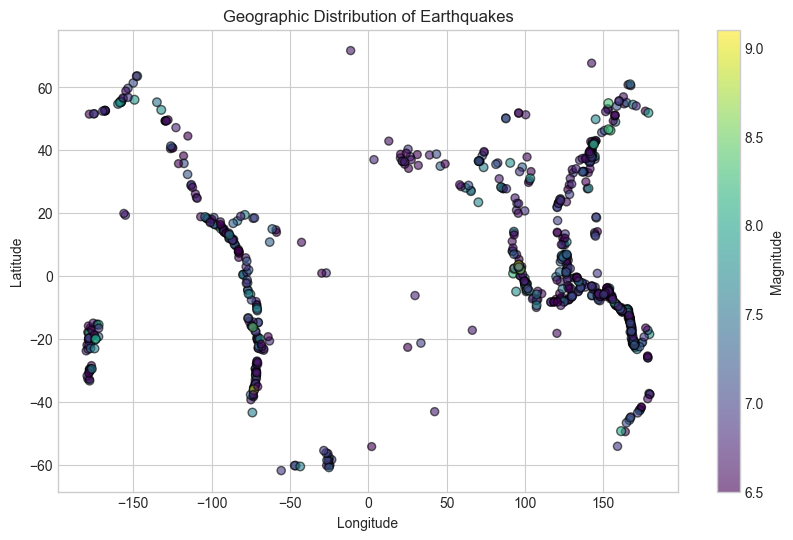

In [46]:
plt.figure(figsize=(10,6))
plt.scatter(df['longitude'],
            df['latitude'], 
            c=df['magnitude'],
            cmap='viridis', 
            s=df['magnitude']*5, alpha=0.6, edgecolors='k')

plt.colorbar(label='Magnitude')
plt.title('Geographic Distribution of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show() 

*Visually distinguish between tsunami and non-tsunami events.

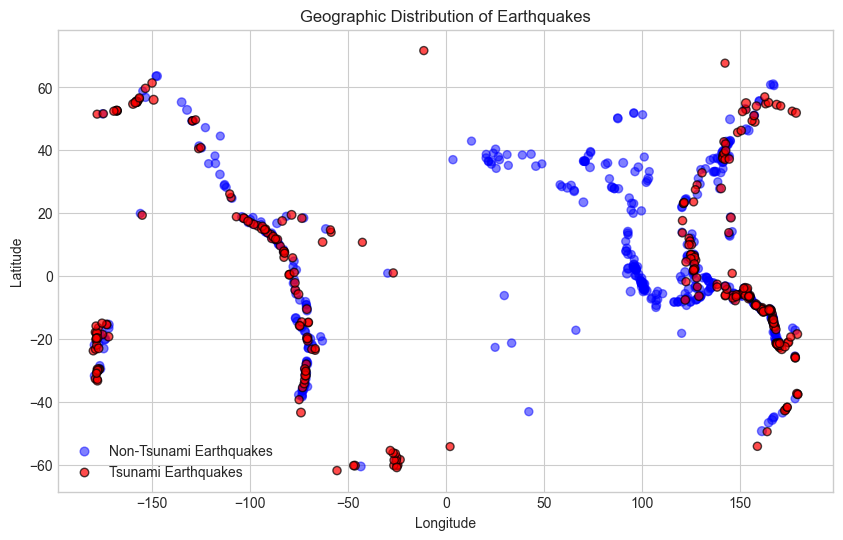

In [47]:
# Separate tsunami vs non-tsunami events
tsunami_eq = df[df['tsunami'] == 1]
non_tsunami_eq = df[df['tsunami'] == 0]

plt.figure(figsize=(10,6))

plt.scatter(non_tsunami_eq['longitude'], non_tsunami_eq['latitude'],
            c='blue', alpha=0.5, s=non_tsunami_eq['magnitude']*5,
            label='Non-Tsunami Earthquakes')

plt.scatter(tsunami_eq['longitude'], tsunami_eq['latitude'],
            c='red', alpha=0.7, s=tsunami_eq['magnitude']*5,
            label='Tsunami Earthquakes', edgecolors='k')

plt.title('Geographic Distribution of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()


*Identify clusters or regions with higher concentration of tsunami events

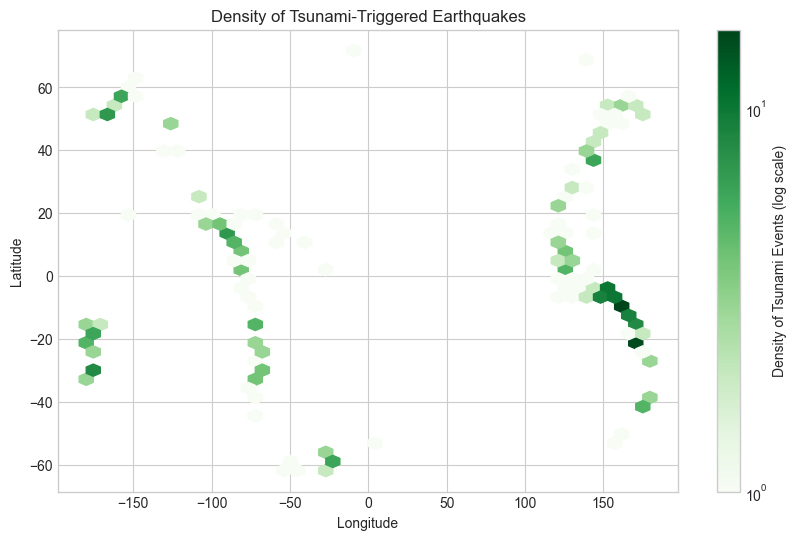

In [48]:
import matplotlib.pyplot as plt

# Filter tsunami events only
tsunami_eq = df[df['tsunami'] == 1]

plt.figure(figsize=(10,6))
plt.hexbin(tsunami_eq['longitude'], tsunami_eq['latitude'], 
           gridsize=40, cmap='Greens', bins='log')

plt.colorbar(label='Density of Tsunami Events (log scale)')
plt.title('Density of Tsunami-Triggered Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


# 4. Statistical and Comparative Analysis:

*Use box plots, histograms, and bar charts to compare seismic features between tsunami
and non-tsunami events.

* 📦 Box Plot — Compare Magnitude & Depth

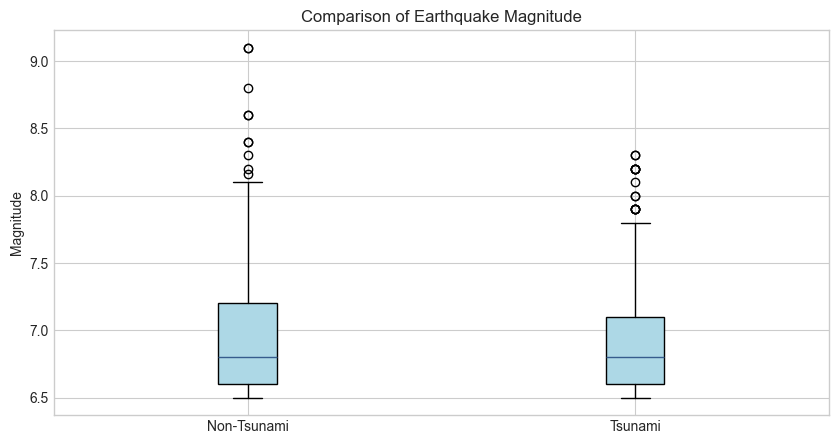

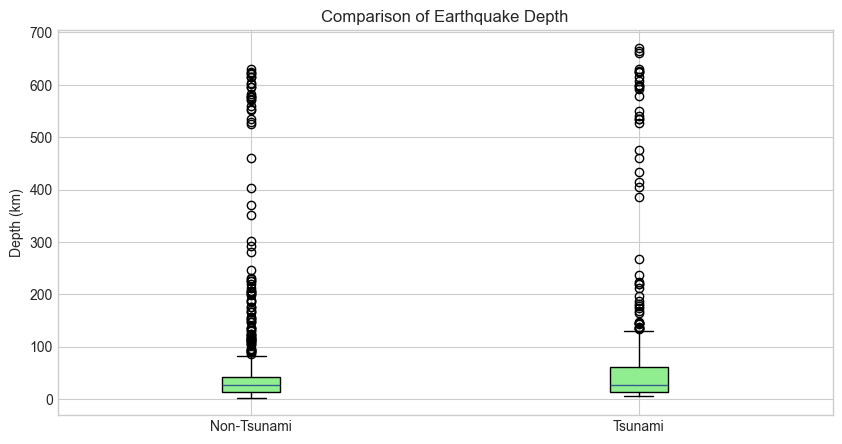

In [51]:
import matplotlib.pyplot as plt

# --- Box plot for Magnitude ---
plt.figure(figsize=(10,5))
plt.boxplot(
    [df[df['tsunami']==0]['magnitude'], df[df['tsunami']==1]['magnitude']],
    patch_artist=True,
    boxprops=dict(facecolor='lightblue'),
    tick_labels=['Non-Tsunami', 'Tsunami']   # ✅ new parameter
)
plt.title('Comparison of Earthquake Magnitude')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

# --- Box plot for Depth ---
plt.figure(figsize=(10,5))
plt.boxplot(
    [df[df['tsunami']==0]['depth'], df[df['tsunami']==1]['depth']],
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen'),
    tick_labels=['Non-Tsunami', 'Tsunami']   # ✅ new parameter
)
plt.title('Comparison of Earthquake Depth')
plt.ylabel('Depth (km)')
plt.grid(True)
plt.show()


* 📊 Histogram — Magnitude Distribution

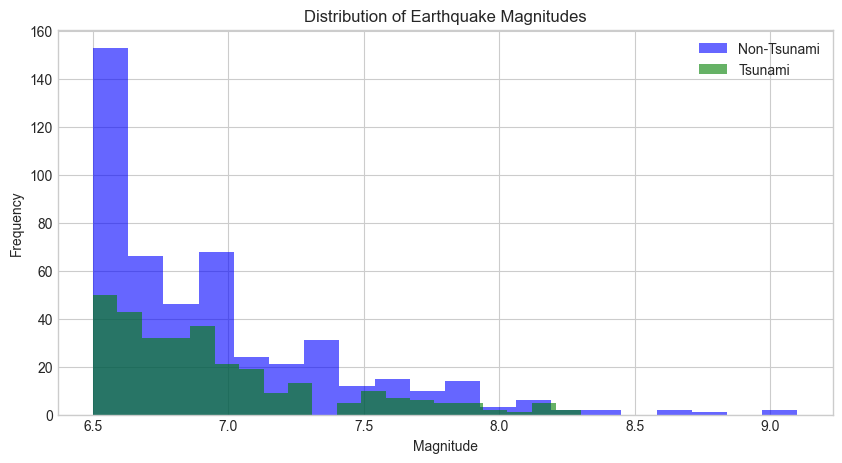

In [53]:
plt.figure(figsize=(10,5))
plt.hist(df[df['tsunami']==0]['magnitude'], bins=20, alpha=0.6, label='Non-Tsunami', color='blue')
plt.hist(df[df['tsunami']==1]['magnitude'], bins=20, alpha=0.6, label='Tsunami', color='green')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


* 📈 Bar Chart — Average Values Comparison

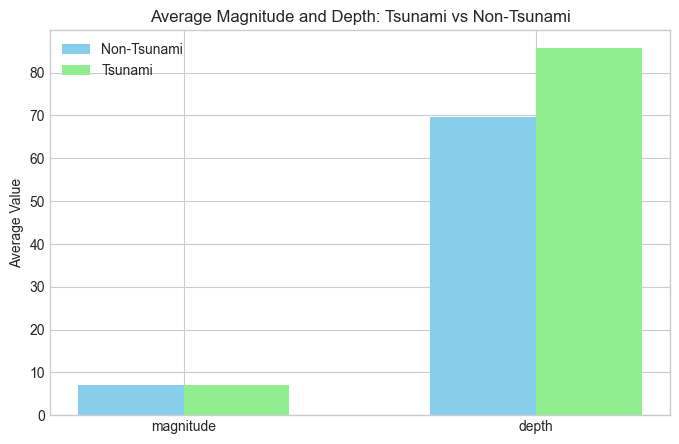

In [54]:
import numpy as np

avg_values = df.groupby('tsunami')[['magnitude', 'depth']].mean()

plt.figure(figsize=(8,5))
x = np.arange(len(avg_values.columns))
plt.bar(x-0.15, avg_values.loc[0], width=0.3, label='Non-Tsunami', color='skyblue')
plt.bar(x+0.15, avg_values.loc[1], width=0.3, label='Tsunami', color='lightgreen')
plt.xticks(x, avg_values.columns)
plt.title('Average Magnitude and Depth: Tsunami vs Non-Tsunami')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()


*Analyze correlations between variables using heatmaps.

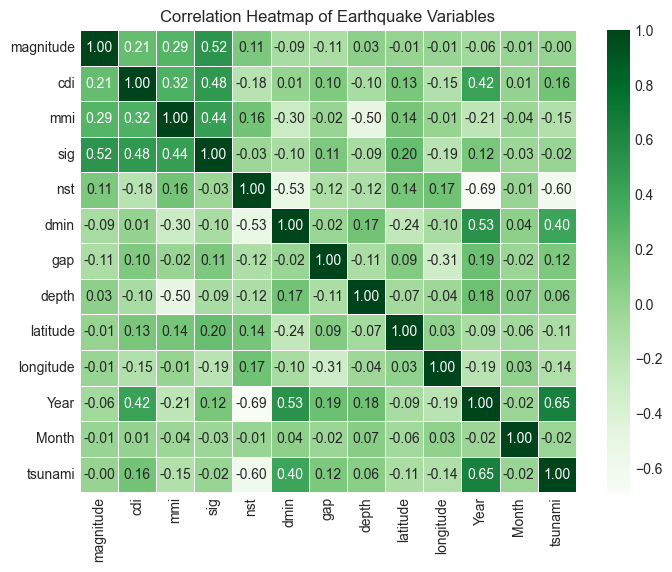

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns  # seaborn makes beautiful heatmaps

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Earthquake Variables')
plt.show()


# 5. Insights and Observations:

*Summarize key differences in seismic behavior between tsunami and non-tsunami
earthquakes.

Summary: Tsunami vs Non-Tsunami Earthquakes ---
  * Tsunami earthquakes usually have higher magnitudes and occur at shallower depths.
  * Non-tsunami earthquakes are generally weaker and often occur deeper within the crust.
  * Tsunami events are concentrated near subduction zones (e.g., Japan, Indonesia, Chile).
  * Non-tsunami events are more widely scattered across different tectonic regions.
  * Magnitude shows a positive correlation with tsunami occurrence.
  * Depth shows a negative correlation — shallow quakes are more likely to cause tsunamis.
  * Tsunami-prone regions show clustering, indicating repeated seismic activity along ocean trenches.
  * In summary: Strong, shallow, and regionally concentrated earthquakes near subduction zones have a much higher likelihood of generating tsunamis.


*Identify seismic thresholds or indicators associated with increased tsunami potential.

Seismic Thresholds and Indicators:

* 1. Magnitude Threshold: Earthquakes with magnitude ≥ 7.5 are more likely to generate tsunamis.  
* 2. Depth Indicator: Shallow-focus earthquakes (depth < 70 km) have higher tsunami potential.  
* 3. Tectonic Setting: Events occurring near oceanic subduction zones pose greater tsunami risk.  
* 4. Fault Type: Thrust or reverse fault movements (vertical displacement) are key tsunami triggers.  
* 5. Geographic Clustering: Regions with frequent shallow, high-magnitude quakes 
     (e.g., Japan, Chile, Indonesia) indicate higher tsunami vulnerability.  
* 6. Correlation Evidence: Positive correlation between magnitude and tsunami occurrence;  
     negative correlation between depth and tsunami activity.  

* Overall: Strong (≥7.5), shallow (<70 km), subduction-zone earthquakes are the primary indicators  
           of increased tsunami potential.
